# IPL Data Analysis

# `Data Pre Processing` : 

## Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sb

## Reading the datasets

In [2]:
matches = pd.read_csv('matches.csv')

In [3]:
deliveries = pd.read_csv('deliveries.csv')

## Getting basic details about the matches dataset

In [4]:
matches.shape

(756, 18)

In [5]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [6]:
deliveries.shape

(179078, 21)

In [7]:
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

## Giving a common name to the 'id' column

In [8]:
deliveries.rename(columns = {'match_id':'id'}, inplace = True)

## Merging both datasets

In [9]:
data = pd.merge(left=matches, right=deliveries, on='id', how='right')
print(data.shape)

(179078, 38)


## Finding repetitions and spelling errors

In [10]:
print(data['city'].unique())

['Hyderabad' 'Pune' 'Rajkot' 'Indore' 'Bangalore' 'Mumbai' 'Kolkata'
 'Delhi' 'Chandigarh' 'Kanpur' 'Jaipur' 'Chennai' 'Cape Town'
 'Port Elizabeth' 'Durban' 'Centurion' 'East London' 'Johannesburg'
 'Kimberley' 'Bloemfontein' 'Ahmedabad' 'Cuttack' 'Nagpur' 'Dharamsala'
 'Kochi' 'Visakhapatnam' 'Raipur' 'Ranchi' 'Abu Dhabi' 'Sharjah' nan
 'Mohali' 'Bengaluru']


* #### Bangalore and Bengaluru are the same city

In [11]:
print(data['winner'].unique())

['Sunrisers Hyderabad' 'Rising Pune Supergiant' 'Kolkata Knight Riders'
 'Kings XI Punjab' 'Royal Challengers Bangalore' 'Mumbai Indians'
 'Delhi Daredevils' 'Gujarat Lions' 'Chennai Super Kings'
 'Rajasthan Royals' 'Deccan Chargers' 'Pune Warriors'
 'Kochi Tuskers Kerala' nan 'Rising Pune Supergiants' 'Delhi Capitals']


* #### Delhi Daredevils and Delhi Capitals are the same team
* #### Rising Pune Supergiant is same as Rising Pune Supergiants

In [12]:
print(data['venue'].unique())

['Rajiv Gandhi International Stadium, Uppal'
 'Maharashtra Cricket Association Stadium'
 'Saurashtra Cricket Association Stadium' 'Holkar Cricket Stadium'
 'M Chinnaswamy Stadium' 'Wankhede Stadium' 'Eden Gardens'
 'Feroz Shah Kotla' 'Punjab Cricket Association IS Bindra Stadium, Mohali'
 'Green Park' 'Punjab Cricket Association Stadium, Mohali'
 'Sawai Mansingh Stadium' 'MA Chidambaram Stadium, Chepauk'
 'Dr DY Patil Sports Academy' 'Newlands' "St George's Park" 'Kingsmead'
 'SuperSport Park' 'Buffalo Park' 'New Wanderers Stadium'
 'De Beers Diamond Oval' 'OUTsurance Oval' 'Brabourne Stadium'
 'Sardar Patel Stadium, Motera' 'Barabati Stadium'
 'Vidarbha Cricket Association Stadium, Jamtha'
 'Himachal Pradesh Cricket Association Stadium' 'Nehru Stadium'
 'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium'
 'Subrata Roy Sahara Stadium'
 'Shaheed Veer Narayan Singh International Stadium'
 'JSCA International Stadium Complex' 'Sheikh Zayed Stadium'
 'Sharjah Cricket Stadium' 'Dubai Inte

* #### 'Punjab Cricket Association IS Bindra Stadium, Mohali' and 'IS Bindra Stadium' and 'Punjab Cricket Association Stadium, Mohali' are same
* #### 'MA Chidambaram Stadium, Chepauk' and 'M. A. Chidambaram Stadium' are same
* #### 'M Chinnaswamy Stadium' and 'M. Chinnaswamy Stadium' are same 
* #### 'Feroz Shah Kotla' and 'Feroz Shah Kotla Ground' are same

## Replacing different names for the same thing with a single name

In [13]:
data.replace({'Bangalore' : 'Bengaluru'}, inplace=True)
data.replace({'Rising Pune Supergiant' : 'Rising Pune Supergiants'}, inplace=True)
data.replace({'Delhi Daredevils' : 'Delhi Capitals'}, inplace=True)
data.replace({'IS Bindra Stadium' : 'Punjab Cricket Association IS Bindra Stadium, Mohali'}, inplace=True)
data.replace({'Punjab Cricket Association Stadium, Mohali' : 'Punjab Cricket Association IS Bindra Stadium, Mohali'}, inplace=True)
data.replace({'MA Chidambaram Stadium, Chepauk' : 'M. A. Chidambaram Stadium'}, inplace=True)
data.replace({'M Chinnaswamy Stadium' : 'M. Chinnaswamy Stadium'}, inplace=True)
data.replace({'Feroz Shah Kotla' : 'Feroz Shah Kotla Ground'}, inplace=True)

matches.replace({'Bangalore' : 'Bengaluru'}, inplace=True)
matches.replace({'Rising Pune Supergiant' : 'Rising Pune Supergiants'}, inplace=True)
matches.replace({'Delhi Daredevils' : 'Delhi Capitals'}, inplace=True)
matches.replace({'IS Bindra Stadium' : 'Punjab Cricket Association IS Bindra Stadium, Mohali'}, inplace=True)
matches.replace({'Punjab Cricket Association Stadium, Mohali' : 'Punjab Cricket Association IS Bindra Stadium, Mohali'}, inplace=True)
matches.replace({'MA Chidambaram Stadium, Chepauk' : 'M. A. Chidambaram Stadium'}, inplace=True)
matches.replace({'M Chinnaswamy Stadium' : 'M. Chinnaswamy Stadium'}, inplace=True)
matches.replace({'Feroz Shah Kotla' : 'Feroz Shah Kotla Ground'}, inplace=True)

## Checking for null values

In [14]:
data.isnull().any()

id                  False
season              False
city                 True
date                False
team1               False
team2               False
toss_winner         False
toss_decision       False
result              False
dl_applied          False
winner               True
win_by_runs         False
win_by_wickets      False
player_of_match      True
venue               False
umpire1              True
umpire2              True
umpire3              True
inning              False
batting_team        False
bowling_team        False
over                False
ball                False
batsman             False
non_striker         False
bowler              False
is_super_over       False
wide_runs           False
bye_runs            False
legbye_runs         False
noball_runs         False
penalty_runs        False
batsman_runs        False
extra_runs          False
total_runs          False
player_dismissed     True
dismissal_kind       True
fielder              True
dtype: bool

### 'city', 'winner', 'player_of_match', 'umpire1', 'umpire2' and 'umpire3' columns have 'NaN' values

## Dealing with null values

In [15]:
matches[matches['city'].isnull()][['city', 'venue']]

,city,venue
461,NaN,Dubai International Cricket Stadium
462,NaN,Dubai International Cricket Stadium
466,NaN,Dubai International Cricket Stadium
468,NaN,Dubai International Cricket Stadium
469,NaN,Dubai International Cricket Stadium
474,NaN,Dubai International Cricket Stadium
476,NaN,Dubai International Cricket Stadium


#### The city of Dubai is to be filled

In [16]:
matches['city'].fillna('Dubai', inplace=True)
data['city'].fillna('Dubai', inplace=True)

In [17]:
matches[matches['winner'].isnull()][['winner', 'result']]

,winner,result
300,NaN,no result
545,NaN,no result
570,NaN,no result
744,NaN,no result


#### 'NaN' values due to no result of match, we remove these rows for ease of working with data

In [18]:
data.drop(data[data['winner'].isnull()].index, inplace=True)

In [19]:
print('umpire1 :', matches['umpire1'].isnull().value_counts())
print('umpire2 :', matches['umpire2'].isnull().value_counts())
print('umpire3 :', matches['umpire3'].isnull().value_counts())

umpire1 : False    754
True       2
Name: umpire1, dtype: int64
umpire2 : False    754
True       2
Name: umpire2, dtype: int64
umpire3 : True     637
False    119
Name: umpire3, dtype: int64


#### 'umpire3' coulumn has a large number of NaN values and hence is insignificant

In [20]:
data.drop(['umpire3'], axis=1, inplace=True)

In [21]:
data.shape

(178706, 37)

In [22]:
data['player_dismissed'].isnull().value_counts()

True     169895
False      8811
Name: player_dismissed, dtype: int64

#### The NaN is because no batsman got out

In [23]:
data['dismissal_kind'].isnull().value_counts()

True     169895
False      8811
Name: dismissal_kind, dtype: int64

In [24]:
data['fielder'].isnull().value_counts()

True     172278
False      6428
Name: fielder, dtype: int64

#### Most of the values in the columns above is null values and hence is insignificant. Thus we drop it

In [25]:
data.drop(['dismissal_kind', 'fielder'], axis=1, inplace=True)

## Adding new column for year

In [26]:
data['date'] = pd.to_datetime(data['date'])
data['year'] = pd.DatetimeIndex(data['date']).year

matches['date'] = pd.to_datetime(matches['date'])
matches['year'] = pd.DatetimeIndex(matches['date']).year

# `Exploratory Data Analysis` :

## Performing Exploratory Data Analysis on the dataset :

### 1. Which team won the most number of games in 2018 ?

In [27]:
df = pd.DataFrame(matches[matches['year']==2018]['winner'].value_counts())
df.sort_values('winner',inplace=True)

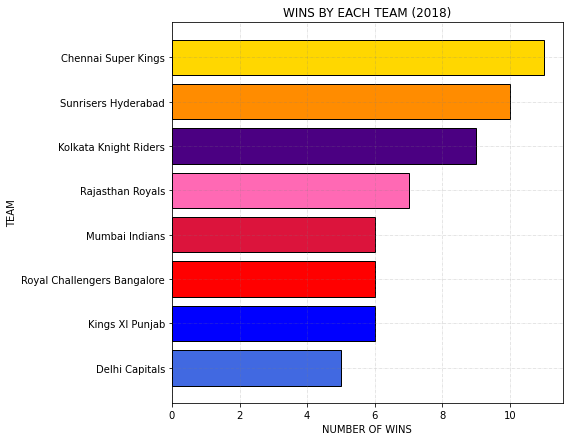

In [28]:
x = np.array(df.index)
y = np.array(df['winner'])
plt.figure(figsize = (7,7))

colors=['royalblue', 'blue', 'red', 'crimson', 'hotpink', 'indigo', 'darkorange', 'gold']

plt.barh(x,y, color=colors, edgecolor='black')
plt.xlabel('NUMBER OF WINS')
plt.ylabel('TEAM')
plt.title('WINS BY EACH TEAM (2018)')

plt.grid(color='grey', linestyle='-.', linewidth=0.5, alpha=0.4)
plt.show()

* #### `Chennai Super Kings` `won` the `maximum number of games` in IPL `2018` season with 11 wins
* #### Delhi Capitals had the least wins with 5 wins

### 2. Which city hosted the maximum number of IPL Matches ?

In [29]:
df = pd.DataFrame(matches['city'].value_counts()).iloc[:10,:]
df.sort_values('city',inplace=True)

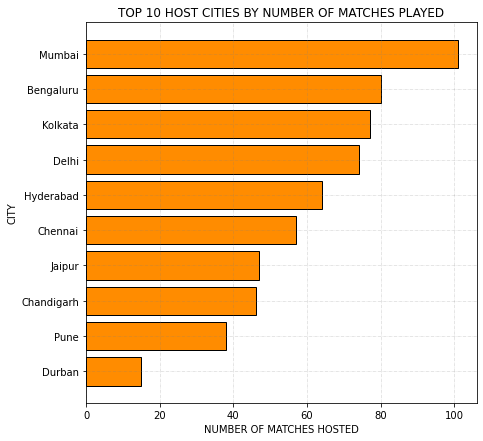

In [30]:
x = np.array(df.index)
y = np.array(df['city'])
plt.figure(figsize = (7,7))

plt.barh(x,y, color='darkorange', edgecolor='black' )
plt.xlabel('NUMBER OF MATCHES HOSTED')
plt.ylabel('CITY')
plt.title('TOP 10 HOST CITIES BY NUMBER OF MATCHES PLAYED')

plt.grid(color='grey', linestyle='-.', linewidth=0.5, alpha=0.4)
plt.show()

* #### `Mumbai` is where the maximum number of matches have been played having hosted `more than 100 matches` and the only city to do so
* #### Bengaluru and kolkata occupy the second and third place respectively with close to 80 matches hosted

### 3. Which team is the most successful ?

In [31]:
df1 = pd.DataFrame(matches['team1'].value_counts() + matches['team2'].value_counts())
df2 = pd.DataFrame(matches['winner'].value_counts())
df3 = pd.concat([df1,df2], axis=1)
df3['percentage'] = (df3['winner']/df3[0])*100

df3.sort_values('percentage',inplace=True)

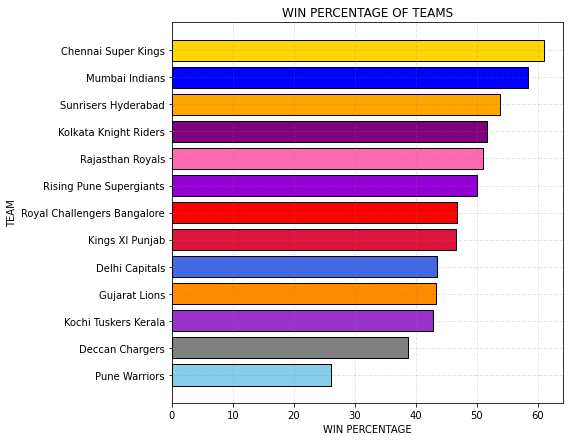

In [32]:
x = np.array(df3.index)
y = np.array(df3['percentage'])
plt.figure(figsize = (7,7))

colors = ['skyblue', 'grey', 'darkorchid', 'darkorange', 'royalblue', 'crimson', 'red', 'darkviolet', 'hotpink', 'purple', 'orange', 'blue', 'gold']

plt.barh(x,y, color=colors, edgecolor='black' )
plt.xlabel('WIN PERCENTAGE')
plt.ylabel('TEAM')
plt.title('WIN PERCENTAGE OF TEAMS')

plt.grid(color='grey', linestyle='-.', linewidth=0.5, alpha=0.4)
plt.show()

* #### `Chennai Super King`s is the most successful team with a `win percentage of 60.97%` 
* #### Its arch rival `Mumbai Indians` is not far away with about `58.29% win percentage`
* #### `Pune Warriors` has the `lowest` win percentage of `26.08%`

### 4. Which player has won the most number of Man of the Match (MoM) awards?

In [33]:
df = pd.DataFrame(matches['player_of_match'].value_counts()).iloc[:10,:]
df.sort_values('player_of_match',inplace=True)

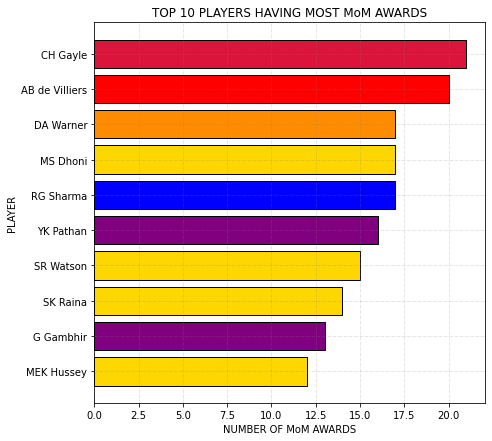

In [34]:
x = np.array(df.index)
y = np.array(df['player_of_match'])
plt.figure(figsize = (7,7))

colors = ['gold', 'purple', 'gold', 'gold', 'purple', 'blue', 'gold', 'darkorange', 'red', 'crimson']

plt.barh(x,y, color=colors, edgecolor='black' )
plt.xlabel('NUMBER OF MoM AWARDS')
plt.ylabel('PLAYER')
plt.title('TOP 10 PLAYERS HAVING MOST MoM AWARDS')

plt.grid(color='grey', linestyle='-.', linewidth=0.5, alpha=0.4)
plt.show()

* #### `Chris Gayle` has the maximum number of man of the match awards having `21` awards
* #### `AB de Villiers` has the next highest having `20` man of the match awards 

### 5. Which team has won the most tosses?

In [35]:
df1 = pd.DataFrame(matches['team1'].value_counts() + matches['team2'].value_counts())
df2 = pd.DataFrame(matches['toss_winner'].value_counts())
df3 = pd.concat([df1,df2], axis=1)
df3['percentage'] = (df3['toss_winner']/df3[0])*100

df3.sort_values('percentage',inplace=True)

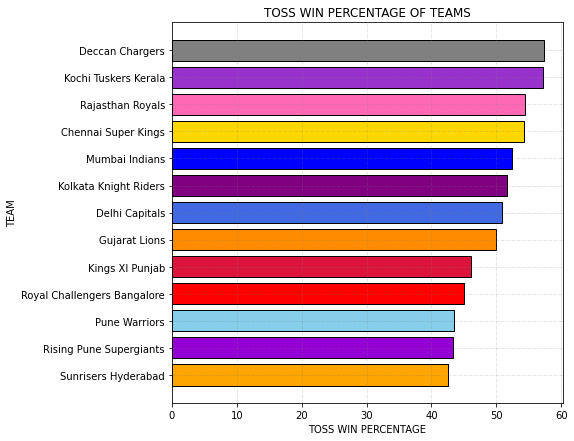

In [36]:
x = np.array(df3.index)
y = np.array(df3['percentage'])
plt.figure(figsize = (7,7))

colors = ['orange', 'darkviolet', 'skyblue', 'red', 'crimson', 'darkorange', 'royalblue', 'purple', 'blue', 'gold', 'hotpink', 'darkorchid', 'grey']

plt.barh(x,y, color=colors, edgecolor='black' )
plt.xlabel('TOSS WIN PERCENTAGE')
plt.ylabel('TEAM')
plt.title('TOSS WIN PERCENTAGE OF TEAMS')

plt.grid(color='grey', linestyle='-.', linewidth=0.5, alpha=0.4)
plt.show()

* #### `Deccan Chargers` have the best toss win percentage of `57.33%` 
* #### `Sunrisers Hyderabad` have the least toss win percentage of `42.59%`

### 6. What are the top 10 greatest victories by runs and by wickets ?

In [37]:
df1 = matches.loc[:,['win_by_runs', 'team1', 'team2', 'winner', 'season']]
df2 = matches.loc[:,['win_by_wickets', 'team1', 'team2', 'winner', 'season']]

df1['between'] = df1['team1'] + ' vs ' + df1['team2'] + '(' + df1['winner'] + ')' + df1['season'].map(str)
df2['between'] = df2['team1']+' vs '+df2['team2'] +'(' + df2['winner'] + ')' + df2['season'].map(str)

df1.sort_values('win_by_runs', ascending=False,inplace=True)
df2.sort_values('win_by_wickets',ascending=False,inplace=True)

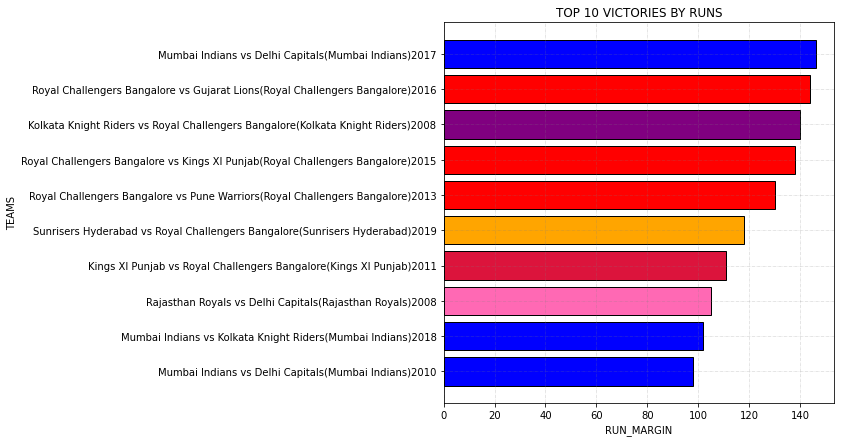

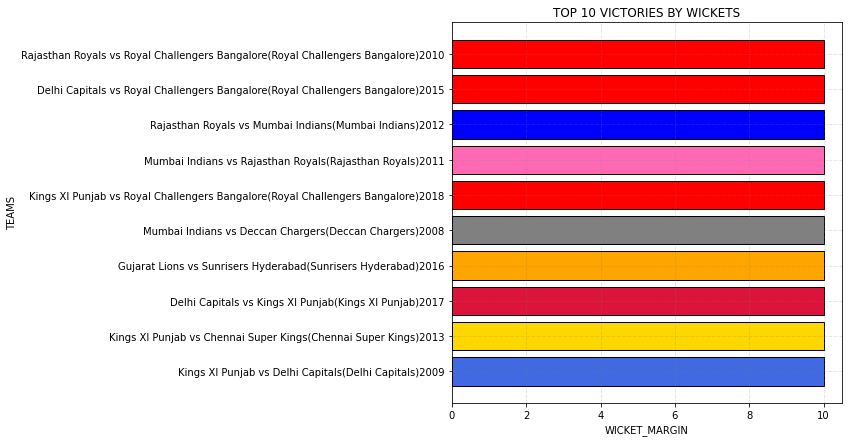

In [38]:
y = np.array(df1.iloc[:10,:].sort_values('win_by_runs')['win_by_runs'])
x = np.array(df1.iloc[:10,:].sort_values('win_by_runs')['between'])
plt.figure(figsize = (7,7))

colors1 = ['blue', 'blue', 'hotpink', 'crimson', 'orange', 'red', 'red', 'purple', 'red', 'blue']

plt.barh(x, y, color=colors1, edgecolor='black' )
plt.xlabel('RUN_MARGIN')
plt.ylabel('TEAMS')
plt.title('TOP 10 VICTORIES BY RUNS')

plt.grid(color='grey', linestyle='-.', linewidth=0.5, alpha=0.4)
plt.show()

y = np.array(df2.iloc[:10,:]['win_by_wickets'])
x = np.array(df2.iloc[:10,:]['between'])
plt.figure(figsize = (7,7))

colors2 = ['royalblue', 'gold', 'crimson', 'orange', 'grey', 'red', 'hotpink', 'blue', 'red', 'red']

plt.barh(x, y, color=colors2, edgecolor='black' )
plt.xlabel('WICKET_MARGIN')
plt.ylabel('TEAMS')
plt.title('TOP 10 VICTORIES BY WICKETS')

plt.grid(color='grey', linestyle='-.', linewidth=0.5, alpha=0.4)
plt.show()

* #### `Mumbai Indians` won with the highest run margin in `2017 against Delhi Capitals` with a margin of `146` runs
* #### All top ten win by wickets have been a `10 wicket` margin with the most recent being `RCB against KXIP` in `2018`

### 7. Who scored the most number of 50s and 100s ?

In [39]:
runs = data.groupby(['batsman','id']).agg({'batsman_runs':'sum'})

centuries = runs[runs['batsman_runs']>=100]
centuries = centuries.groupby(['batsman']).agg({'count'})
centuries.sort_values(('batsman_runs', 'count'), ascending=False, inplace=True)
toptenc = centuries.iloc[:10,:].sort_values(('batsman_runs', 'count'))

fifties = runs[runs['batsman_runs']>=50]
fifties = fifties.groupby(['batsman']).agg({'count'})
fifties.sort_values(('batsman_runs', 'count'), ascending=False, inplace=True)
toptenf = fifties.iloc[:10,:].sort_values(('batsman_runs', 'count'))

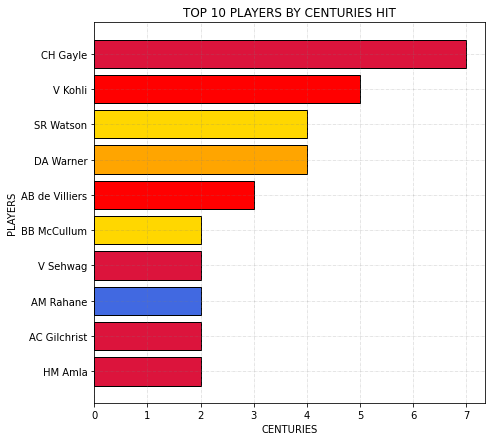

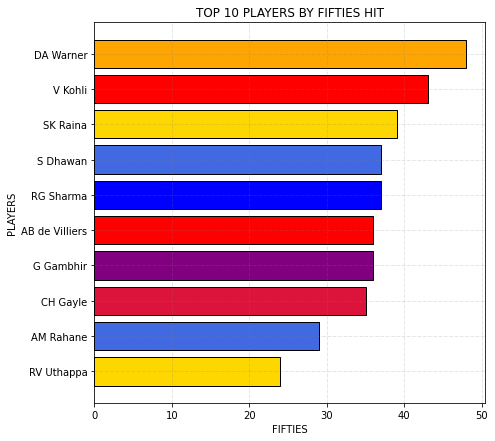

In [40]:
x = np.array(toptenc.index)
y = np.array(toptenc[('batsman_runs', 'count')])
plt.figure(figsize = (7,7))

colors1 = ['crimson', 'crimson', 'royalblue', 'crimson', 'gold', 'red', 'orange', 'gold', 'red', 'crimson']

plt.barh(x, y, color=colors1, edgecolor='black' )
plt.xlabel('CENTURIES')
plt.ylabel('PLAYERS')
plt.title('TOP 10 PLAYERS BY CENTURIES HIT')
plt.grid(color='grey', linestyle='-.', linewidth=0.5, alpha=0.4)
plt.show()

x = np.array(toptenf.index)
y = np.array(toptenf[('batsman_runs', 'count')])
plt.figure(figsize = (7,7))

colors2 = ['gold', 'royalblue', 'crimson', 'purple', 'red', 'blue', 'royalblue', 'gold', 'red', 'orange']

plt.barh(x, y, color=colors2, edgecolor='black' )
plt.xlabel('FIFTIES')
plt.ylabel('PLAYERS')
plt.title('TOP 10 PLAYERS BY FIFTIES HIT')
plt.grid(color='grey', linestyle='-.', linewidth=0.5, alpha=0.4)
plt.show()

* #### Chris Gayle has hit the most number of `centuries` in IPL with a total of `7` fifties scored
* #### David Warner has hit the most number of `Fifties` in IPL with a total of `48` fifties scored

### 8. Head to Head of two teams

In [41]:
def team1_vs_team2(team1,team2):
    mt=matches[((matches['team1']==team1)|(matches['team2']==team1))&((matches['team1']==team2)|(matches['team2']==team2))]
    plt.figure(figsize = (10,7))
    sb.set_style("darkgrid")
    sb.countplot(data=mt, x='season', hue='winner', edgecolor='black').set_title('HEAD TO HEAD') 
    plt.show()

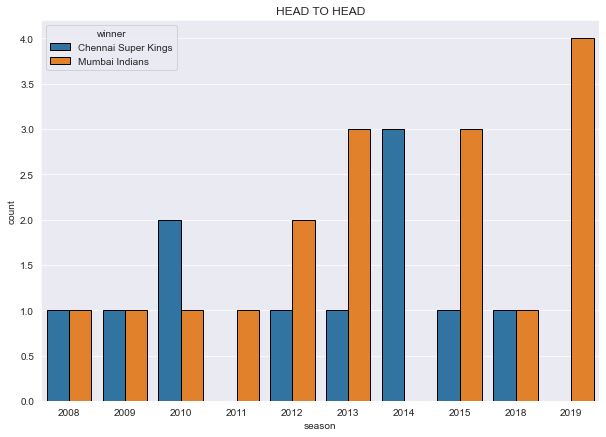

In [42]:
team1_vs_team2('Chennai Super Kings', 'Mumbai Indians')

* #### During 2014 season, Mumbai Indians didnt even win a single match against Chennai Super Kings
* #### During 2011 and 2019 seasons, Chennai Super Kings didnt even win a single match against Mumbai Indians 

### 9. Mean Strike Rate of each batsman per over

In [43]:
data['balls'] = 1

total_runs_batsman = data.groupby(['batsman']).agg({'batsman_runs':sum})

runs_batsman = data.groupby(['batsman','over']).agg({'batsman_runs':'sum'})
balls_batsman = data.groupby(['batsman', 'over']).agg({'balls':'sum'})

strike_rate = pd.merge(left=runs_batsman, right=balls_batsman, on=['batsman', 'over'], how='right')
strike_rate['strike_rate'] = (strike_rate['batsman_runs']/strike_rate['balls'])*100
strike_rate = strike_rate.fillna(0)

strike_rate.reset_index(level=0, inplace=True)
strike_rate.reset_index(level=0, inplace=True)

strike_rate
total_runs_batsman
total_runs_batsman.rename(columns = {'batsman_runs':'total_runs'}, inplace = True)

end_data = pd.merge(left=strike_rate, right=total_runs_batsman, on='batsman', how='right')
end_data = end_data.sort_values("total_runs", ascending=False)

data_needed = end_data.iloc[:397, :]

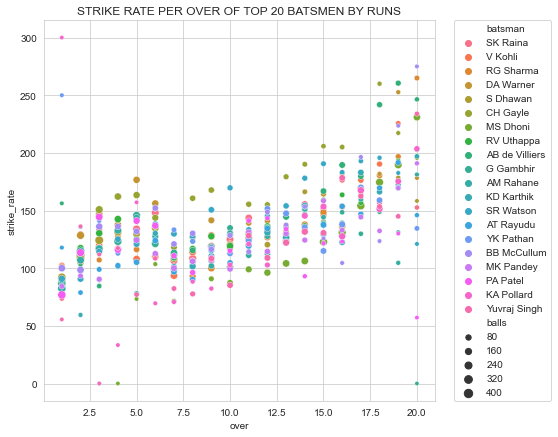

In [44]:
plt.figure(figsize = (7,7))
sb.set_style("whitegrid")
sb.scatterplot(data=data_needed, x='over', y='strike_rate', hue='batsman', size='balls').set_title('STRIKE RATE PER OVER OF TOP 20 BATSMEN BY RUNS')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()

# `Machine Learning Models` : 

## Creating a final encoded dataset to apply ML models

### Combining over and ball into single feaure 

In [45]:
data['over_ball'] = data['over'].astype(str) + '.' + data['ball'].astype(str)

### Adding two new Feature variables namely `cum_runs` and `cum_wickets`

In [46]:
data['inning'] = data['id'].astype(str)+(data['batting_team']).astype(str)
innings = data['inning'].unique()

In [47]:
data.loc[data["player_dismissed"].isnull(),"wicket"]=0
data.loc[data["player_dismissed"].notna(),"wicket"]=1
data['wicket']=data['wicket'].astype(int)

In [48]:
all_innings = pd.DataFrame({})

for i in range(len(innings)):
    one_inning = data.loc[data['inning']==innings[i]]
    one_inning = one_inning.sort_values(['over_ball'], ascending=[True])
    one_inning = one_inning[['inning', 'over_ball','batsman_runs','extra_runs', 'total_runs', 'wicket', 'batting_team', 
                             'bowling_team', 'venue', 'toss_winner', 'team1', 'team2', 'winner', 'toss_decision']].reset_index(drop=True)
    one_inning['cum_runs'] = one_inning['total_runs'].cumsum()
    one_inning['cum_wickets'] = one_inning['wicket'].cumsum()
    all_innings = pd.concat([all_innings, one_inning]) 

### new column for `final score`

In [49]:
final_score_data = all_innings.groupby(['inning']).agg({'total_runs':'sum'})
final_score_data.rename(columns = {'total_runs':'final_score'}, inplace = True)
final_score_data = final_score_data.reset_index()

In [50]:
all_innings = pd.merge(left=all_innings, right=final_score_data, on='inning', how='right')

In [51]:
all_innings = all_innings.drop(['extra_runs', 'total_runs', 'wicket'], axis='columns')

### Encoding

In [52]:
from sklearn.preprocessing import LabelEncoder
encoder= LabelEncoder()

all_innings["team1"]=encoder.fit_transform(all_innings["team1"])
all_innings["team2"]=encoder.fit_transform(all_innings["team2"])
all_innings["winner"]=encoder.fit_transform(all_innings["winner"].astype(str))

all_innings["batting_team"]=encoder.fit_transform(all_innings["batting_team"])
all_innings["bowling_team"]=encoder.fit_transform(all_innings["bowling_team"])
all_innings["toss_winner"]=encoder.fit_transform(all_innings["toss_winner"])
all_innings["venue"]=encoder.fit_transform(all_innings["venue"])

all_innings.loc[all_innings["toss_winner"]==all_innings["batting_team"],"bat_toss_win"]=1
all_innings.loc[all_innings["toss_winner"]!=all_innings["batting_team"],"bat_toss_win"]=0

all_innings.loc[all_innings["winner"]==all_innings["team1"],"team1_win"]=1
all_innings.loc[all_innings["winner"]!=all_innings["team1"],"team1_win"]=0

all_innings.loc[all_innings["toss_winner"]==all_innings["team1"],"team1_toss_win"]=1
all_innings.loc[all_innings["toss_winner"]!=all_innings["team1"],"team1_toss_win"]=0

all_innings["team1_bat"]=0
all_innings.loc[(all_innings["team1_toss_win"]==1) & (all_innings["toss_decision"]=="bat"),"team1_bat"]=1

### Removing highly correlated variables

In [53]:
prediction_df=all_innings[["over_ball","batting_team","bowling_team","bat_toss_win","venue","cum_runs","cum_wickets",
                           "final_score","team1","team2","team1_toss_win","team1_bat","team1_win"]]

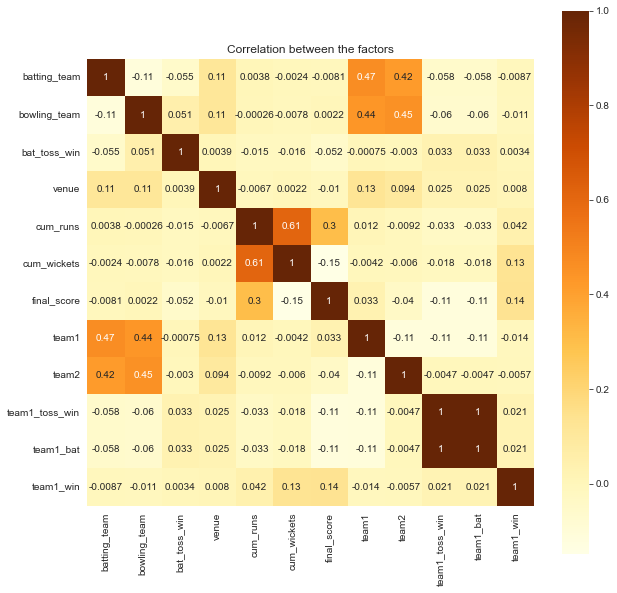

In [54]:
corr = prediction_df.corr()
plt.figure(figsize = (10,10))
sb.heatmap(corr, square=True, annot=True, cmap="YlOrBr").set_title('Correlation between the factors')
plt.show()

* #### team1_bat and team1_toss_win are highly correlated
* #### drop team1_bat

In [55]:
prediction_df = prediction_df.drop(['team1_bat'], axis='columns')

In [56]:
prediction_df.columns

Index(['over_ball', 'batting_team', 'bowling_team', 'bat_toss_win', 'venue',
       'cum_runs', 'cum_wickets', 'final_score', 'team1', 'team2',
       'team1_toss_win', 'team1_win'],
      dtype='object')

## Winner predictor

### `'winner'` is the target variable 
### `"over_ball"`,`"bat_toss_win"`,`"venue"`,`"cum_runs"`,`"cum_wickets"`,`"team1"`,`"team2"`, `"team1_toss_win"` are the feature variables from the data 

### Splitting Data into Test and Train datasets

In [57]:
import random
random.seed(0)
np.random.seed(0)

In [58]:
x1 = prediction_df[["over_ball","bat_toss_win","venue","cum_runs","cum_wickets","team1","team2","team1_toss_win"]]
y1 = prediction_df['team1_win']

In [59]:
from sklearn.model_selection import train_test_split
x1_train,x1_test,y1_train,y1_test = train_test_split(x1, y1,test_size=0.20, random_state=4)

### Training using Random Forest Classifier

In [60]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier()
model_rf.fit(x1_train, y1_train) 
predictions_rf=model_rf.predict(x1_test)

from sklearn.metrics import accuracy_score
accuracy_rf = accuracy_score(y1_test, predictions_rf)
print("accuracy score using Random Forest Classifier is :", accuracy_rf)

accuracy score using Random Forest Classifier is : 0.9756309104135191


### Training using Decision Tree Classifier

In [61]:
from sklearn.tree import DecisionTreeClassifier
model_dtc = DecisionTreeClassifier()
model_dtc.fit(x1_train, y1_train) 
predictions_dtc=model_dtc.predict(x1_test)

from sklearn.metrics import accuracy_score
accuracy_dtc = accuracy_score(y1_test, predictions_dtc)
print("accuracy score using Decision Tree Classifier is :", accuracy_dtc)

accuracy score using Decision Tree Classifier is : 0.9592915897263723


### Training using Logistic regresion

In [62]:
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression()
model_lr.fit(x1_train, y1_train) 
predictions_lr=model_lr.predict(x1_test)

from sklearn.metrics import accuracy_score
accuracy_lr = accuracy_score(y1_test, predictions_lr)
print("accuracy score using Logistic regresion is :", accuracy_lr)

accuracy score using Logistic regresion is : 0.5797661015052319


### Training using Gradient Boosting Classifier

In [63]:
from sklearn.ensemble import GradientBoostingClassifier
model_gbc = GradientBoostingClassifier()
model_gbc.fit(x1_train, y1_train) 
predictions_gbc=model_gbc.predict(x1_test)

from sklearn.metrics import accuracy_score
accuracy_gbc = accuracy_score(y1_test, predictions_gbc)
print("accuracy score using Gradient Boosting Classifier is :", accuracy_gbc)

accuracy score using Gradient Boosting Classifier is : 0.7068714677410329


In [64]:
pd.DataFrame({'Model':['Random Forest Classifier', 'Decision Tree Classifier', 'Logistic Regression', 
                       'Gradient Boosting Classifier'], 'Accuracy':[accuracy_rf, accuracy_dtc, accuracy_lr, accuracy_gbc]})

,Model,Accuracy
0,Random Forest Classifier,0.975631
1,Decision Tree Classifier,0.959292
2,Logistic Regression,0.579766
3,Gradient Boosting Classifier,0.706871


#### Clearly `Random Forest Classifier` Gives higher accuracy of `97.56%`

## Score Predictor

### `final_score` is the Target variable 
### `"over_ball"`,`"batting_team"`,`"bowling_team"`,`"bat_toss_win"`,`"venue"`,`"cum_runs"`,`"cum_wickets"`, are the Feature Variables

### Splitting Data into test and train datasets

In [65]:
import random
random.seed(0)
np.random.seed(0)

In [66]:
x2 = prediction_df[["over_ball","batting_team","bowling_team","bat_toss_win","venue","cum_runs","cum_wickets"]]
y2 = prediction_df["final_score"]

In [67]:
from sklearn.model_selection import train_test_split
x2_train,x2_test,y2_train,y2_test = train_test_split(x2, y2,test_size=0.10)

### Defining a custom accuracy function with an error margin of +/- 10 runs

In [68]:
def custom_acc(y_test,y_pred):
    r = 0
    l = len(y_pred)
    for i in range(0,l):
        if(abs(y_pred[i]-y_test[i])<=10):
            r+=1
    return((r/l)*100)

### Training using Random Forest Regressor

In [69]:
from sklearn.ensemble import RandomForestRegressor
model_rf = RandomForestRegressor()
model_rf.fit(x2_train, y2_train) 
predictions_rf=model_rf.predict(x2_test)

acc_rf = custom_acc(y2_test.values, predictions_rf)
print('custom accuracy using Random Forest Regressor :', acc_rf)

custom accuracy using Random Forest Regressor : 76.47025907895473


### Training using Gradient Boosting Regressor

In [70]:
from sklearn.ensemble import GradientBoostingRegressor
model_gbr = GradientBoostingRegressor()
model_gbr.fit(x2_train, y2_train) 
predictions_gbr=model_gbr.predict(x2_test)

acc_gbr = custom_acc(y2_test.values, predictions_gbr)
print('custom accuracy using Random Forest Regressor :', acc_gbr)

custom accuracy using Random Forest Regressor : 49.275362318840585


### Training using Decision Tree Regressor

In [71]:
from sklearn.tree import DecisionTreeRegressor
model_dtr = DecisionTreeRegressor()
model_dtr.fit(x2_train, y2_train) 
predictions_dtr=model_dtr.predict(x2_test)

acc_dtr = custom_acc(y2_test.values, predictions_dtr)
print('custom accuracy using Random Forest Regressor :', acc_dtr)

custom accuracy using Random Forest Regressor : 79.09462257288344


In [72]:
pd.DataFrame({'Model':['Random Forest Reressor', 'Gradient Boosting Regressor', 'Decision Tree Regressor' ],
              'Accuracy':[acc_rf, acc_gbr, acc_dtr]})

,Model,Accuracy
0,Random Forest Reressor,76.470259
1,Gradient Boosting Regressor,49.275362
2,Decision Tree Regressor,79.094623


#### Clearly `Decision Tree Regressor` Gives highest custom accuracy of `79.09` %

# `Deep Learning Models`

In [73]:
import tensorflow as tf
from tensorflow import keras

## Winner Predictor

In [74]:
x1_train = np.asarray(x1_train).astype('float32')
y1_train = np.asarray(y1_train).astype('float32')
x1_test = np.asarray(x1_test).astype('float32')
y1_test = np.asarray(y1_test).astype('float32')

model1 = tf.keras.Sequential([tf.keras.Input(shape=(8,)),
                              tf.keras.layers.Dense(units=300, activation='sigmoid'),
                              tf.keras.layers.Dense(units=90, activation='sigmoid'),
                              tf.keras.layers.Dense(units=1, activation='sigmoid')])
model1.compile(loss='mean_squared_error', metrics=['accuracy'])

history1=model1.fit(x1_train, y1_train, epochs=100, validation_data=(x1_test, y1_test),shuffle= False)

Epoch 1/100
4468/4468 [==============================] - 5s 937us/step - loss: 0.2413 - accuracy: 0.5761 - val_loss: 0.2334 - val_accuracy: 0.6000
Epoch 2/100
4468/4468 [==============================] - 4s 1000us/step - loss: 0.2293 - accuracy: 0.6077 - val_loss: 0.2231 - val_accuracy: 0.6200
Epoch 3/100
4468/4468 [==============================] - 4s 900us/step - loss: 0.2175 - accuracy: 0.6400 - val_loss: 0.2113 - val_accuracy: 0.6608
Epoch 4/100
4468/4468 [==============================] - 5s 1ms/step - loss: 0.1979 - accuracy: 0.6850 - val_loss: 0.1905 - val_accuracy: 0.6995
Epoch 5/100
4468/4468 [==============================] - 4s 924us/step - loss: 0.1859 - accuracy: 0.7092 - val_loss: 0.1842 - val_accuracy: 0.7138
Epoch 6/100
4468/4468 [==============================] - 4s 893us/step - loss: 0.1798 - accuracy: 0.7211 - val_loss: 0.1791 - val_accuracy: 0.7235
Epoch 7/100
4468/4468 [==============================] - 4s 989us/step - loss: 0.1738 - accuracy: 0.7321 - val_loss: 0.

4468/4468 [==============================] - 4s 898us/step - loss: 0.0465 - accuracy: 0.9381 - val_loss: 0.0508 - val_accuracy: 0.9317
Epoch 57/100
4468/4468 [==============================] - 4s 893us/step - loss: 0.0460 - accuracy: 0.9390 - val_loss: 0.0506 - val_accuracy: 0.9323
Epoch 58/100
4468/4468 [==============================] - 4s 897us/step - loss: 0.0456 - accuracy: 0.9392 - val_loss: 0.0493 - val_accuracy: 0.9358
Epoch 59/100
4468/4468 [==============================] - 4s 900us/step - loss: 0.0451 - accuracy: 0.9400 - val_loss: 0.0469 - val_accuracy: 0.9377
Epoch 60/100
4468/4468 [==============================] - 4s 893us/step - loss: 0.0448 - accuracy: 0.9405 - val_loss: 0.0472 - val_accuracy: 0.9375
Epoch 61/100
4468/4468 [==============================] - 4s 889us/step - loss: 0.0444 - accuracy: 0.9407 - val_loss: 0.0502 - val_accuracy: 0.9320
Epoch 62/100
4468/4468 [==============================] - 4s 883us/step - loss: 0.0439 - accuracy: 0.9416 - val_loss: 0.0478 

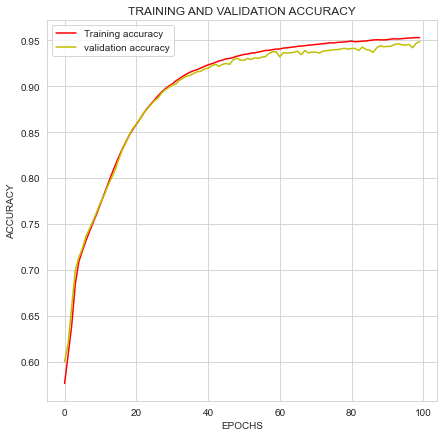

In [75]:
acc_train1 = history1.history['accuracy']
acc_val1 = history1.history['val_accuracy']
plt.figure(figsize = (7,7))

epochs = range(0,100)
plt.plot(epochs, acc_train1, 'r', label='Training accuracy')
plt.plot(epochs, acc_val1, 'y', label='validation accuracy')
plt.title('TRAINING AND VALIDATION ACCURACY')
plt.xlabel('EPOCHS')
plt.ylabel('ACCURACY')
plt.legend()
plt.show()

### The model gives an accuracy of `94.87%` with the validation dataset

In [76]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 300)               2700      
                                                                 
 dense_1 (Dense)             (None, 90)                27090     
                                                                 
 dense_2 (Dense)             (None, 1)                 91        
                                                                 
Total params: 29,881
Trainable params: 29,881
Non-trainable params: 0
_________________________________________________________________


## Score Predictor

In [81]:
x2_train = np.asarray(x2_train).astype('float32')
y2_train = np.asarray(y2_train).astype('float32')
x2_test = np.asarray(x2_test).astype('float32')
y2_test = np.asarray(y2_test).astype('float32')

model2 = tf.keras.Sequential([tf.keras.Input(shape=(7,)),
                              tf.keras.layers.Dense(units=300, activation = 'swish'),
                              tf.keras.layers.Dense(units=90, activation = 'swish'),
                              tf.keras.layers.Dense(units=1, activation = 'swish')])
model2.compile(loss='mean_squared_error', metrics=['RootMeanSquaredError', custom_acc])

history2=model2.fit(x2_train, y2_train, epochs=50, validation_data=(x2_test, y2_test),shuffle= False)

Epoch 1/50
5027/5027 [==============================] - 9s 2ms/step - loss: 574.6633 - root_mean_squared_error: 23.9721 - custom_acc: 41.0821 - val_loss: 409.3779 - val_root_mean_squared_error: 20.2331 - val_custom_acc: 47.8418
Epoch 2/50
5027/5027 [==============================] - 9s 2ms/step - loss: 400.6414 - root_mean_squared_error: 20.0160 - custom_acc: 48.5667 - val_loss: 388.3147 - val_root_mean_squared_error: 19.7057 - val_custom_acc: 50.5691
Epoch 3/50
5027/5027 [==============================] - 8s 2ms/step - loss: 387.1943 - root_mean_squared_error: 19.6773 - custom_acc: 49.7043 - val_loss: 376.3005 - val_root_mean_squared_error: 19.3985 - val_custom_acc: 51.1673
Epoch 4/50
5027/5027 [==============================] - 9s 2ms/step - loss: 378.4576 - root_mean_squared_error: 19.4540 - custom_acc: 50.4434 - val_loss: 365.3774 - val_root_mean_squared_error: 19.1148 - val_custom_acc: 51.8116
Epoch 5/50
5027/5027 [==============================] - 9s 2ms/step - loss: 372.7068 - r

Epoch 37/50
5027/5027 [==============================] - 8s 2ms/step - loss: 298.7582 - root_mean_squared_error: 17.2846 - custom_acc: 54.7630 - val_loss: 307.6042 - val_root_mean_squared_error: 17.5386 - val_custom_acc: 54.2427
Epoch 38/50
5027/5027 [==============================] - 8s 2ms/step - loss: 297.8905 - root_mean_squared_error: 17.2595 - custom_acc: 54.8258 - val_loss: 299.9480 - val_root_mean_squared_error: 17.3190 - val_custom_acc: 54.8800
Epoch 39/50
5027/5027 [==============================] - 8s 2ms/step - loss: 296.1187 - root_mean_squared_error: 17.2081 - custom_acc: 54.9595 - val_loss: 295.8894 - val_root_mean_squared_error: 17.2014 - val_custom_acc: 55.4957
Epoch 40/50
5027/5027 [==============================] - 8s 2ms/step - loss: 295.1958 - root_mean_squared_error: 17.1813 - custom_acc: 55.0770 - val_loss: 291.4041 - val_root_mean_squared_error: 17.0706 - val_custom_acc: 55.6921
Epoch 41/50
5027/5027 [==============================] - 8s 2ms/step - loss: 294.654

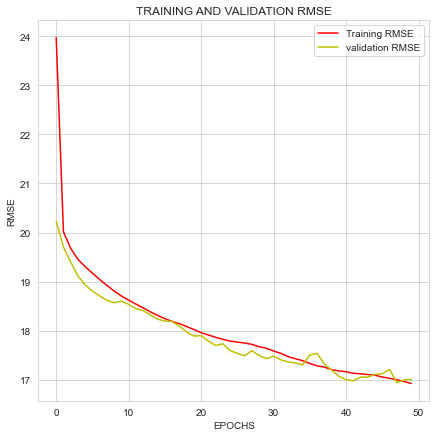

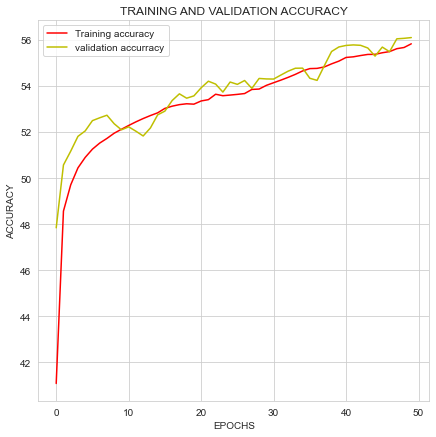

In [82]:
rmse_train2 = history2.history['root_mean_squared_error']
rmse_val2 = history2.history['val_root_mean_squared_error']
plt.figure(figsize = (7,7))

epochs = range(0,50)
plt.plot(epochs, rmse_train2, 'r', label='Training RMSE')
plt.plot(epochs, rmse_val2, 'y', label='validation RMSE')
plt.title('TRAINING AND VALIDATION RMSE')
plt.xlabel('EPOCHS')
plt.ylabel('RMSE')
plt.legend()
plt.show()


rmse_train2 = history2.history['custom_acc']
rmse_val2 = history2.history['val_custom_acc']
plt.figure(figsize = (7,7))

epochs = range(0,50)
plt.plot(epochs, rmse_train2, 'r', label='Training accuracy')
plt.plot(epochs, rmse_val2, 'y', label='validation accurracy')
plt.title('TRAINING AND VALIDATION ACCURACY')
plt.xlabel('EPOCHS')
plt.ylabel('ACCURACY')
plt.legend()
plt.show()

### The model gives an RMSE of `17.03` and custom accuracy of `56.10%` with the validation dataset 

In [83]:
model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 300)               2400      
                                                                 
 dense_10 (Dense)            (None, 90)                27090     
                                                                 
 dense_11 (Dense)            (None, 1)                 91        
                                                                 
Total params: 29,581
Trainable params: 29,581
Non-trainable params: 0
_________________________________________________________________


# END